In [39]:
import numpy as np
import pandas as pd
import stumps

In [40]:
## load data
data = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY data/kentucky_stumps.csv")
X, Y = data.loc[:,:'current_violence>=1'], data.loc[:,'recid_two_year':]
Y[Y == -1] = 0
cols = data.columns[:-14]

In [41]:
Y_recid2 = Y['recid_two_year'].values
Y_recid_drug2 = Y['recid_drug_two_year'].values
Y_recid_violence2 = Y['recid_violence_two_year'].values
Y_recid_F2 = Y['recid_F_two_year'].values
Y_recid_M2 = Y['recid_M_two_year'].values
Y_recid_property2 = Y['recid_property_two_year'].values

In [42]:
alpha = [0.001]
recid2 = stumps.stump_features(X, Y_recid2, cols, alpha, 816)
recid_violence2 = stumps.stump_features(X, Y_recid_violence2, cols, alpha, 816)
recid_drug2 = stumps.stump_features(X, Y_recid_drug2, cols, alpha, 816)
recid_property2 = stumps.stump_features(X, Y_recid_property2, cols, alpha, 816)
recid_F2 = stumps.stump_features(X, Y_recid_F2, cols, alpha, 816)
recid_M2 = stumps.stump_features(X, Y_recid_M2, cols, alpha, 816)

In [44]:
results = [["Recid Two Year", round(np.mean(recid2['test_auc']),3), round(np.mean(recid2['test_auc']),3) - round(np.mean(recid2['test_auc']),3)],
           ["Violence Two Year", round(np.mean(recid_violence2['test_auc']), 3), round(np.mean(recid_violence2['test_auc']),3) - round(np.mean(recid_violence2['test_auc']),3)],
           ["Drug Two Year", round(np.mean(recid_drug2['test_auc']),3), round(np.mean(recid_drug2['test_auc']),3) - round(np.mean(recid_drug2['test_auc']),3)],
           ["Property Two Year", round(np.mean(recid_property2['test_auc']),3), round(np.mean(recid_property2['test_auc']),3) - round(np.mean(recid_property2['test_auc']),3)],
           ["Felony Two Year", round(np.mean(recid_F2['test_auc']),3), round(np.mean(recid_F2['test_auc']),3) - round(np.mean(recid_F2['test_auc']),3)],
           ["Misdemeanor Two Year", round(np.mean(recid_M2['test_auc']),3), round(np.mean(recid_M2['test_auc']),3) - round(np.mean(recid_M2['test_auc']),3)]]

In [45]:
results

[['Recid Two Year', 0.736, 0.0],
 ['Violence Two Year', 0.815, 0.0],
 ['Drug Two Year', 0.698, 0.0],
 ['Property Two Year', 0.78, 0.0],
 ['Felony Two Year', 0.744, 0.0],
 ['Misdemeanor Two Year', 0.711, 0.0]]

## Plot Table/Visualizations

In [46]:
stumps.stump_table(recid2['coefs'], recid2['features'], recid2['intercept'], recid2['dictionary'])

+-----------------------------------+----------------+
| Features                          | Score          |
|====================================================|
| Gender>=1                         | 0.024          |
| age_at_current_charge<=19         | 0.007          |
| age_at_current_charge<=38         | 0.011          |
| age_at_current_charge<=43         | 0.007          |
| age_at_current_charge<=46         | 0.018          |
| age_at_current_charge<=52         | 0.011          |
| p_arrest>=2                       | 0.117          |
| p_arrest>=3                       | 0.096          |
| p_arrest>=4                       | 0.075          |
| p_arrest>=5                       | 0.064          |
| p_arrest>=6                       | 0.037          |
| p_arrest>=7                       | 0.047          |
| p_arrest>=8                       | 0.015          |
| p_arrest>=9                       | 0.035          |
| p_charges>=2                      | 0.003          |
| p_violen

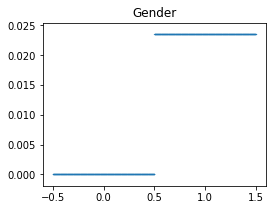

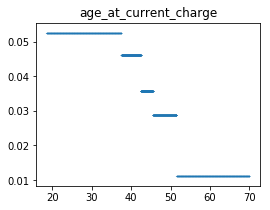

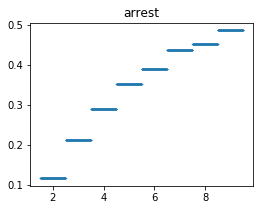

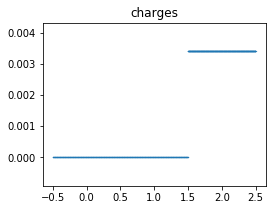

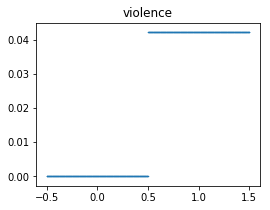

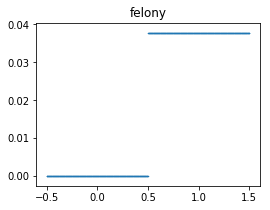

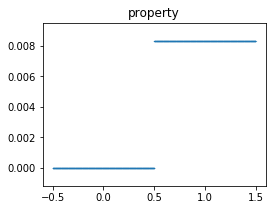

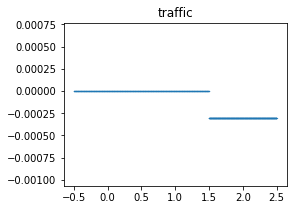

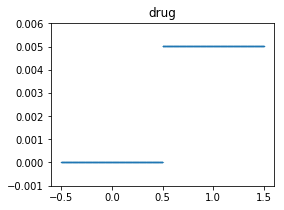

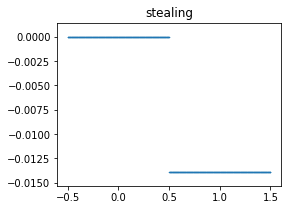

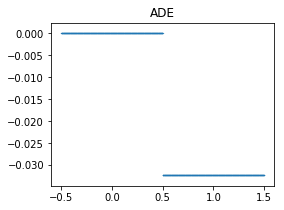

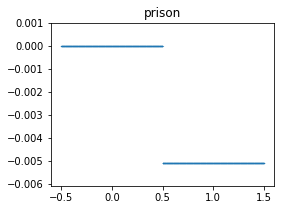

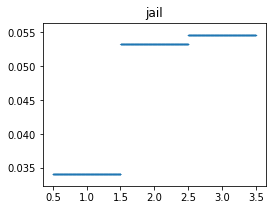

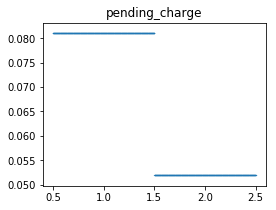

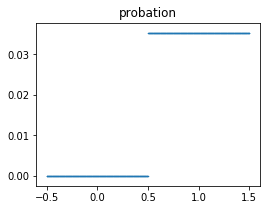

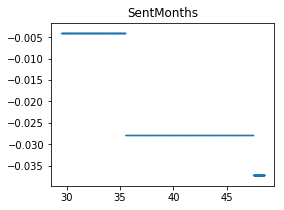

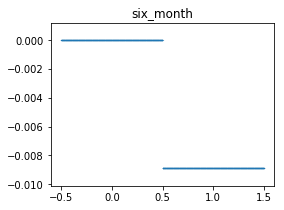

In [47]:
stumps.stump_plots(recid2['features'], recid2['coefs'])
pass